<a href="https://colab.research.google.com/github/parvi-a/parvin/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

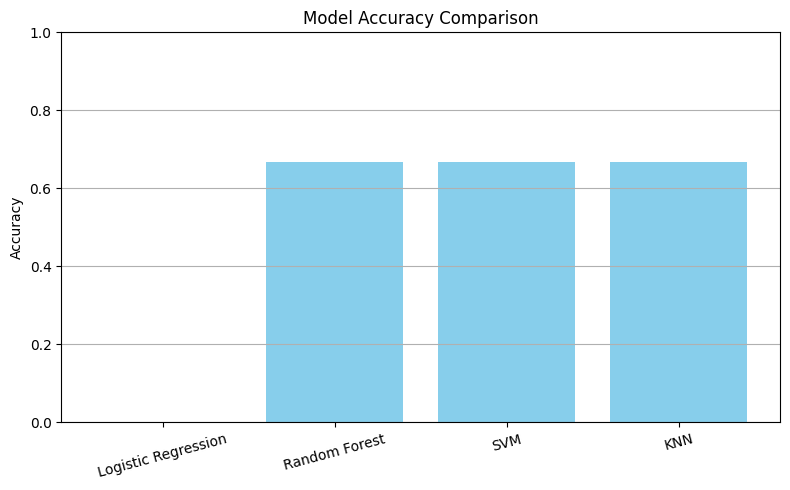

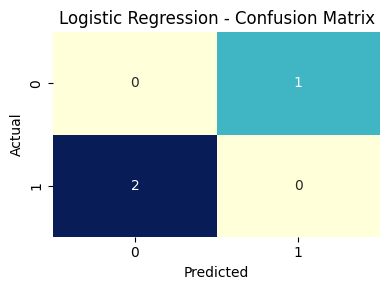

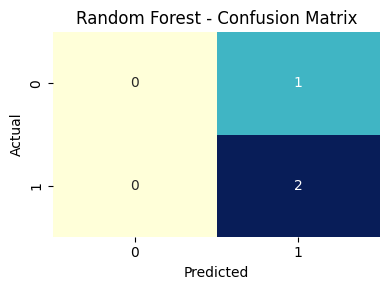

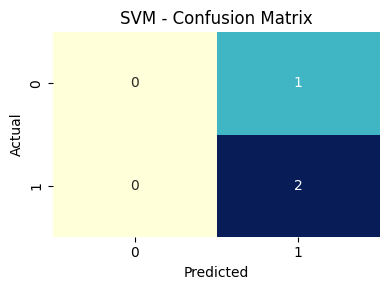

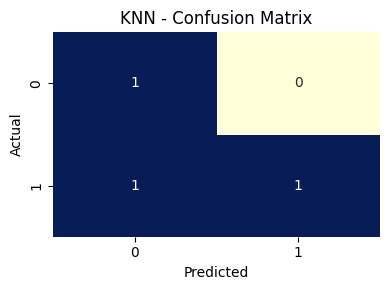


Logistic Regression - Classification Report
              precision  recall  f1-score  support
0                   0.0     0.0       0.0      1.0
1                   0.0     0.0       0.0      2.0
accuracy            0.0     0.0       0.0      0.0
macro avg           0.0     0.0       0.0      3.0
weighted avg        0.0     0.0       0.0      3.0

Random Forest - Classification Report
              precision  recall  f1-score  support
0                  0.00    0.00      0.00     1.00
1                  0.67    1.00      0.80     2.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.33    0.50      0.40     3.00
weighted avg       0.44    0.67      0.53     3.00

SVM - Classification Report
              precision  recall  f1-score  support
0                  0.00    0.00      0.00     1.00
1                  0.67    1.00      0.80     2.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.33    0.50      0.40     3.00
weighted avg       0

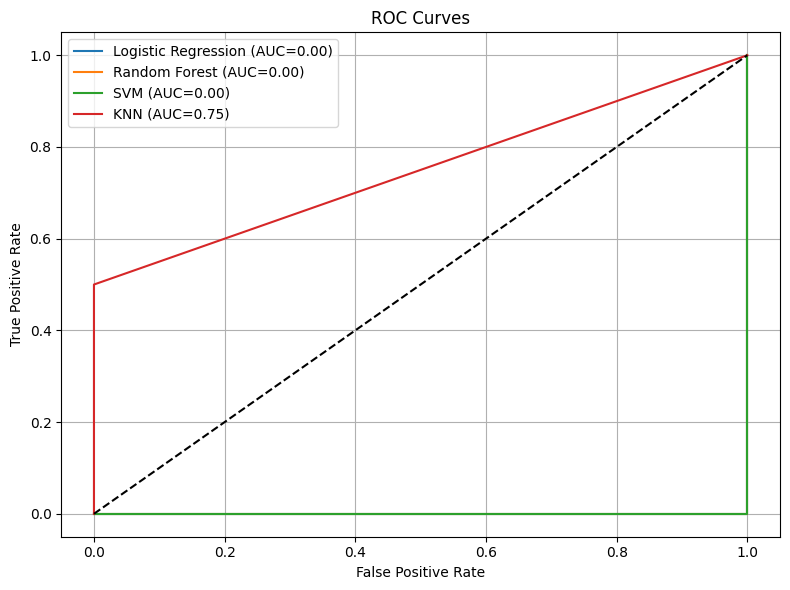

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# ✅ Sample Dataset (Manually Included)
data = pd.DataFrame({
    'age': [63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 62, 57, 53, 58],
    'sex': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
    'cp': [1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 2],
    'trestbps': [145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 130, 140, 150],
    'chol': [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 231, 236, 203, 243],
    'fbs': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    'restecg': [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
    'thalach': [150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 146, 174, 155, 170],
    'exang': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 1.4, 1.6, 1.2, 2.6, 0.8, 3.1, 0.0],
    'slope': [0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2],
    'ca': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0],
    'thal': [1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 3, 3, 3, 2],
    'target': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
})

# Features and target
X = data.drop('target', axis=1)
y = data['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

results = {}
conf_matrices = {}

# Train, evaluate, and collect results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': acc,
        'report': report,
        'cm': cm,
        'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'fpr_tpr': roc_curve(y_test, y_proba) if y_proba is not None else None
    }

# =========================
# 🔹 Accuracy Bar Plot
# =========================
plt.figure(figsize=(8, 5))
accs = [v['accuracy'] for v in results.values()]
plt.bar(results.keys(), accs, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# =========================
# 🔹 Confusion Matrix Heatmaps
# =========================
for name, result in results.items():
    cm = result['cm']
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# =========================
# 🔹 Classification Reports
# =========================
for name, result in results.items():
    print(f"\n{name} - Classification Report")
    df_report = pd.DataFrame(result['report']).transpose()
    print(df_report.round(2))

# =========================
# 🔹 ROC Curve
# =========================
plt.figure(figsize=(8, 6))
for name, result in results.items():
    if result['fpr_tpr'] is not None:
        fpr, tpr, _ = result['fpr_tpr']
        auc = result['roc_auc']
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()